## Second Phase of Internship 

## Asfand Amjad | DHC 1023 | Task 1 | Term Deposit Subscription Prediction 

## Step 1 : Problem Statement 

#### Banks Conduct marketting compaign to encourage customers to subscribes to a term deposit.
#### However contacting every customer is cosly and inefficient.
#### The goal of this project is to build a machine learning classification model which predicts that 
#### customer will subscribes to a term deposit or not based on customer features.

#### Step 2 : Import Basic Libraries 

In [2]:
import pandas as pd                  #Dataset handling    
import numpy as np                   #Numerical Operational 

#### Step 3 : Loading a Dataset 

In [3]:
df = pd.read_csv(r"C:\Users\Alkaram\Desktop\bank-additional-full.csv",sep=';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Step 4 : Inspecting this dataset  

In [5]:
df_tail = df.tail(10)
print(df_tail)

       age          job   marital            education default housing loan  \
41178   62      retired   married    university.degree      no      no   no   
41179   64      retired  divorced  professional.course      no     yes   no   
41180   36       admin.   married    university.degree      no      no   no   
41181   37       admin.   married    university.degree      no     yes   no   
41182   29   unemployed    single             basic.4y      no     yes   no   
41183   73      retired   married  professional.course      no     yes   no   
41184   46  blue-collar   married  professional.course      no      no   no   
41185   56      retired   married    university.degree      no     yes   no   
41186   44   technician   married  professional.course      no      no   no   
41187   74      retired   married  professional.course      no     yes   no   

        contact month day_of_week  ...  campaign  pdays  previous  \
41178  cellular   nov         thu  ...         2      6      

In [6]:
df_shape = df.shape
print(df_shape)

(41188, 21)


In [7]:
df_info = df.info()
print(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df_describe = df.describe();
print(df_describe)

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

In [9]:
df_columns = df.columns
print(df_columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


#### Step 4 : Importing Visualisation Libraries 

In [10]:
import matplotlib.pyplot as plt                     
import seaborn as sns

#### Step 5 : Importing Preprocessing Tools 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#### Step 6 : Importing Machine Learning Models 

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#### Step 7 : Importing Evaluation Metrices 

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

#### Step 8 : Importing Explainable AI Library 

In [19]:
import shap

#### Step 9 : Data Preprocessing 

##### Data Wrangling : Checking Misssing Values 

In [20]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

##### Checking Unknown Values 

In [22]:
(df == 'unknown').sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

##### Replace Unknown With NAN 

In [32]:
df.replace('unknown', np.nan, inplace=True)

In [33]:
(df == 'unknown').sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

##### Handling Missing Categorical Values 

In [28]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

##### Handling Missing Numerical Values 

In [34]:
for col in df.select_dtypes(exclude='object').columns:
    df[col] = df[col].fillna(df[col].median())

##### Checking Duplicates 

In [30]:
df.duplicated().sum()

12

In [35]:
df.drop_duplicates(inplace=True)

In [36]:
df.duplicated().sum()

0

##### Separte Feature and Target 

In [31]:
X = df.drop('y', axis=1)
y = df['y'].map({'no': 0, 'yes': 1})

##### Identify feature types 

In [37]:
categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(exclude='object').columns

##### Creating Preprocessing Pipelines 

In [39]:
preprocessor = ColumnTransformer(
    transformers=[ ('num', StandardScaler(), numerical_features),('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)]
)

#### Step 10 : Train Test Split 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)


##### Step 11 : Logistic Regression Model 

##### Logistic Model Pipeline 

In [42]:
log_model = Pipeline(
    steps=[
        ('preprocessing', preprocessor),
        ('model', LogisticRegression(max_iter=1000))
    ]
)

##### Train Logistic Regression Model 

In [44]:
log_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                ('model', LogisticRegression(max_iter=1000))])

##### Logistic Regression Prediction 

In [45]:
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:,1]

#### Step 12 : Evaluation Metrices For Logistic Regression 

##### Logistic Regression Confusion Matrix 

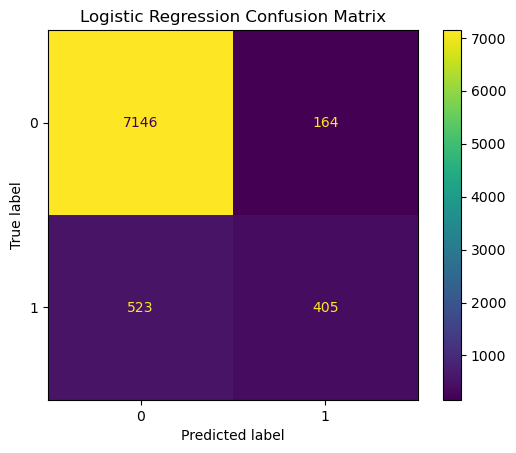

In [46]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

##### Logistic Regression F1 Score 

In [47]:
print("Logistic Regression F1 Score:", f1_score(y_test, y_pred_log))

Logistic Regression F1 Score: 0.5410821643286573


##### Logistic Regression ROC Score 

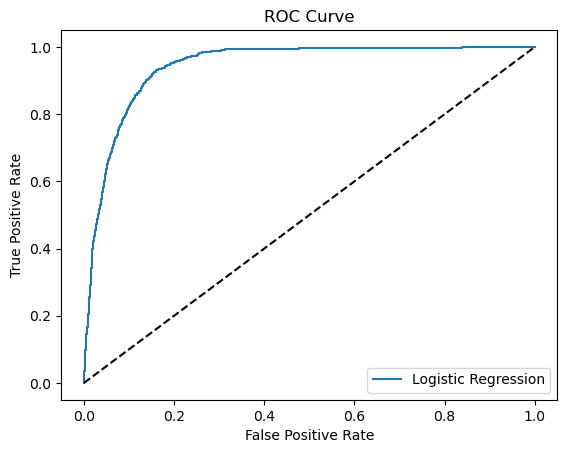

In [48]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

#### Step 13 : Random Forest Model 

##### Random Forest Pipeline 

In [49]:
rf_model = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42))
])

##### Train Random Forest 

In [50]:
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

##### Random Forest Predictions 

In [51]:
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

#### Step 14 : Evaluation Metrices for Random Forest 

##### Random Forest Confusion Matrix 

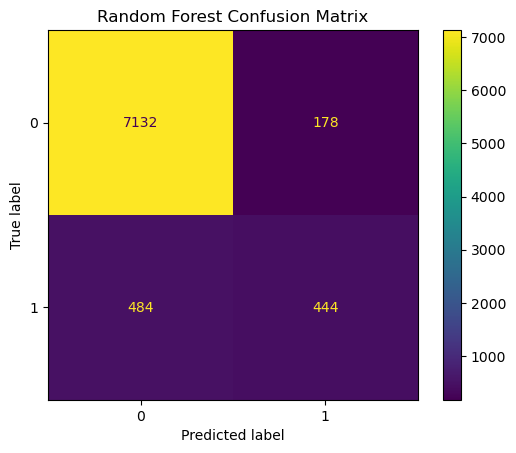

In [52]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.title("Random Forest Confusion Matrix")
plt.show()

##### Random Forest F1 Score 

In [53]:
print("Random Forest F1 Score:", f1_score(y_test, y_pred_rf))

Random Forest F1 Score: 0.5729032258064516


##### Random Forest ROC Curve 

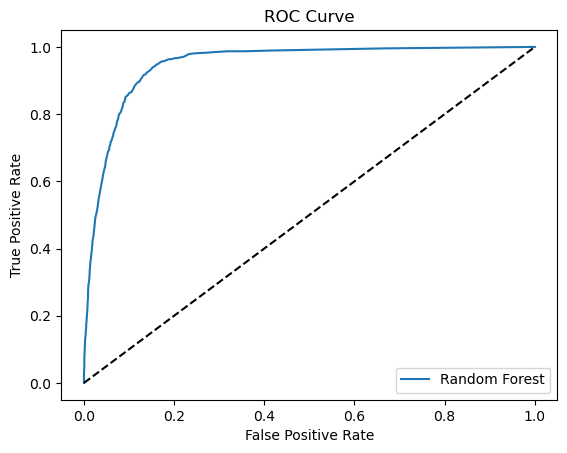

In [54]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

#### Step 15 : SHAP 

In [ ]:
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

In [ ]:
rf = rf_model.named_steps['classifier']
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test_proc)

In [ ]:
for i in range(5):
    shap.force_plot(explainer.expected_value[1],
                    shap_values[1][i],
                    X_test.iloc[i],
                    matplotlib=True)

In [ ]:
shap.summary_plot(shap_values[1], X_test_proc)

#### Step 16 : Conclusion 

##### Random Forest slightly outperforms Logistic Regression by capturing non-linear relationships.
##### Key features like campaign contacts, previous outcomes, and economic indicators strongly influence subscription.
##### Banks can use these insights to target likely customers and reduce marketing costs.